# Pymaceuticals Inc.
---

### Analysis
##### Analysis can go here or at the bottom of the file.  I usually put it at the end.
1.  
2.
3. 

In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_complete.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [113]:
# Checking the number of mice.
mice_id = mouse_study_complete['Mouse ID'].unique()
total_mice = len(mice_id)
total_mice

249

249

In [114]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_complete.loc[mouse_study_complete['Mouse ID'] == 'g989']
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


array(['g989'], dtype=object)

In [115]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = mouse_study_complete.loc[mouse_study_complete['Mouse ID'] == 'g989']
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [116]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID (aka remove all records for that mouse)
# There are multiple ways of doing this and it is good to search online to see the suggestions.

mouse_clean_df = mouse_study_complete.drop_duplicates(subset = "Mouse ID",
                                    keep = 'first', inplace = False)

mouse_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [117]:
# Checking the number of mice in the clean DataFrame.

mice_id_new = mouse_clean_df['Mouse ID']
new_total_mice = (mice_id_new).count() - 1
new_total_mice

248

248

## Summary Statistics

In [118]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# by using groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


mean = mouse_study_complete.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = mouse_study_complete.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = mouse_study_complete.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard_dev = mouse_study_complete.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = mouse_study_complete.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary = pd.DataFrame(mean)

summary_clean = summary.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
summary_clean["Median Tumor Volume"] = median
summary_clean["Tumor Volume Variance"] = variance
summary_clean["Tumor Volume Std. Dev."] = standard_dev
summary_clean["Tumor Volume Std. Err."] = sem

summary_clean

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [119]:
# Method 2:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# by using the aggregation method, produce the same summary statistics in a single line

drug_regimen = mouse_study_complete.groupby('Drug Regimen')
drug_summary = drug_regimen.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
drug_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, ' ')

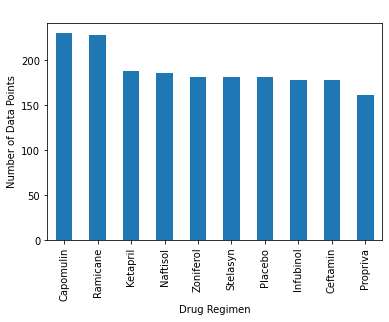

In [213]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_plot = mouse_study_complete['Drug Regimen'].value_counts().plot.bar(width=0.5)

# Set labels for axes
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Data Points")
bar_plot.set_title(" ")

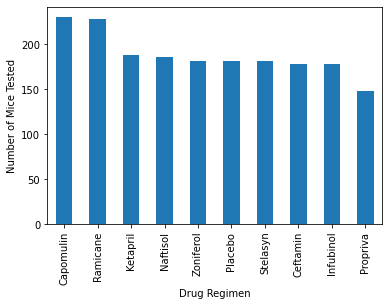

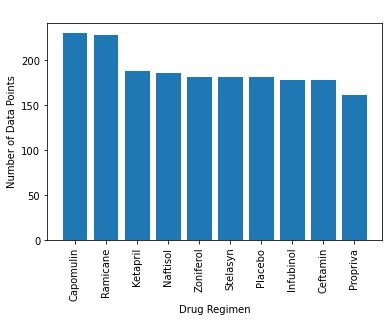

In [226]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Calculate the amount of data points for each drug regimen
counts = mouse_study_complete['Drug Regimen'].value_counts()

# Set the x_axis to the length of the 'counts' series
x_axis = np.arange(len(counts))

# Generate a bar plot with the length of the 'counts' series
# as the amount of values on the x axis, and the corresponding values
# in the series as the y values
plt.bar(x_axis, counts, width = 0.8, zorder=3)

# Label the tick marks according to the index values in the 'counts' series
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)

# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title(" ")



# Display resulting plot
plt.show()

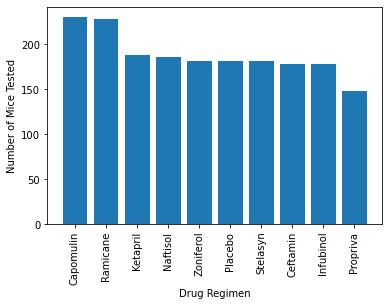

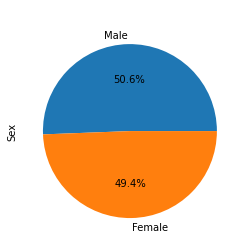

In [242]:
# Method1:  Generate a pie plot showing the distribution of female versus male mice using Pandas
# To clarify:  This answers the question:  of all the measurements taken, what percent where on male and female mice.
# This is different than: of all the mice, what percent were male and female?

# Getting the data from the merged DF
data = mouse_study_complete['Sex'].value_counts()

# Plotting the pie chart
pie_plot = data.plot.pie(autopct="%1.1f%%", title=' ')

plt.savefig('piechart1')


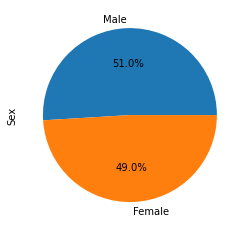

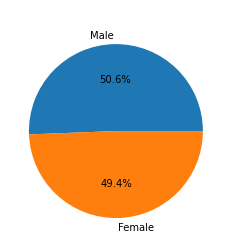

<Figure size 432x288 with 0 Axes>

In [247]:
# Method 2:  Generate a pie plot showing the distribution of female versus male mice using matplotlib (aka pyplot, plt)
# Same clarification as above.

# Identify distribution of data by sex
data = mouse_study_complete['Sex'].value_counts()

#Create a pie chart filled with corresponding percentages
plt.pie(data, labels=data.index.values, autopct="%1.1f%%")
plt.title(" ")




# Display resulting plot
plt.show()
plt.savefig('piechart2')


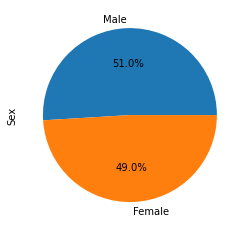

## Quartiles, Outliers and Boxplots

In [104]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Put treatments into a list for for loop (and later for plot labels)

cap_df = mouse_study_complete.loc[mouse_study_complete["Drug Regimen"] == "Capomulin",:]
ram_df = mouse_study_complete.loc[mouse_study_complete["Drug Regimen"] == "Ramicane", :]
inf_df = mouse_study_complete.loc[mouse_study_complete["Drug Regimen"] == "Infubinol", :]
ceft_df = mouse_study_complete.loc[mouse_study_complete["Drug Regimen"] == "Ceftamin", :]

#Capomulin
caplast = cap_df.groupby('Mouse ID').max()['Timepoint']
caplastvol = pd.DataFrame(caplast)
caplastmerge = pd.merge(caplastvol, mouse_study_complete, on=("Mouse ID","Timepoint"),how="left")



# More information should be provided about this part since it is confusing and difficult.
# Part of this is similar to Day3 but **the suggestions make more sense** if you know you are doing
# this so so you have 4 lists contained inside a list bc this is used to generate the boxplot in the next cell.


# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

tumors = caplastmerge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq



    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound}")

    

ramlast = ram_df.groupby('Mouse ID').max()['Timepoint']
ramlastvol = pd.DataFrame(ramlast)
ramlastmerge = pd.merge(ramlastvol, mouse_study_complete, on=("Mouse ID","Timepoint"),how="left")

#Ramicane
tumors2 = ramlastmerge["Tumor Volume (mm3)"]

quartiles2 = tumors2.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane potential outliers could be values below {lower_bound2} and above {upper_bound2}")

inflast = inf_df.groupby('Mouse ID').max()['Timepoint']
inflastvol = pd.DataFrame(inflast)
inflastmerge = pd.merge(inflastvol, mouse_study_complete, on=("Mouse ID","Timepoint"),how="left")

#Infubinol
tumors3 = inflastmerge["Tumor Volume (mm3)"]

quartiles3 = tumors3.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol potential outliers could be values below {lower_bound3} and above {upper_bound3}")

ceftlast = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceftlastvol = pd.DataFrame(ceftlast)
ceftlastmerge = pd.merge(ceftlastvol, mouse_study_complete, on=("Mouse ID","Timepoint"),how="left")


#Ceftamin
tumors4 = ceftlastmerge["Tumor Volume (mm3)"]

quartiles4 = tumors4.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Ceftamin potential outliers could be values below {lower_bound4} and above {upper_bound4}")

    
# Print results of each drugs outliers - results printed don't need to look pretty.  See below.    
# Note:  in the output below:  '31   36.32346' is series index 31 and value 36.32346.  There is only one outlier.




Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549
Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135
Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001
Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


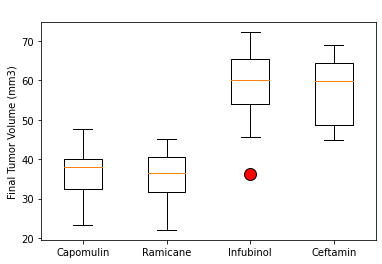

In [255]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plot_data = [tumors, tumors2, tumors3, tumors4]
flierprops = dict(marker='o', markerfacecolor='r', markersize=12, markeredgecolor='black')

# Plot boxplot
plt.boxplot(plot_data, flierprops=flierprops)

# Add title and labels to boxplot
plt.title(" ")
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

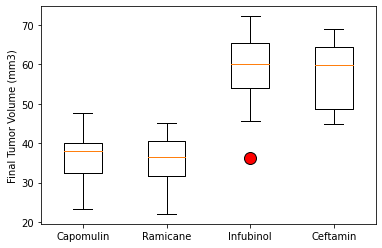

## Line and Scatter Plots

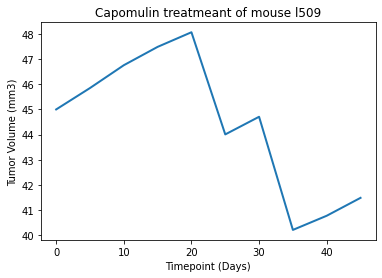

In [108]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


forline_df = cap_df.loc[cap_df["Mouse ID"] == "l509",:]


x_axisTP = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

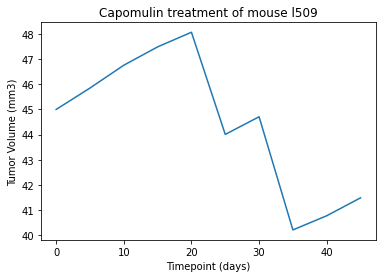

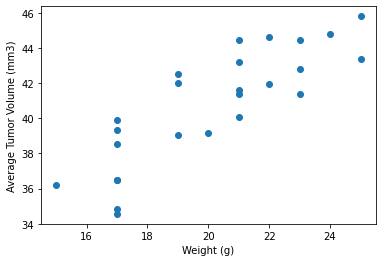

In [109]:
# Generate a scatter plot of average tumor volume vs. average mouse weight of each mouse treated with the Capomulin regimen
# The chart below shows a dot for each mouse treated with Capomulin using average weight and average tumor Volume.
#  I would make the X-label say something like "Average Weight (g)"

capavg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()


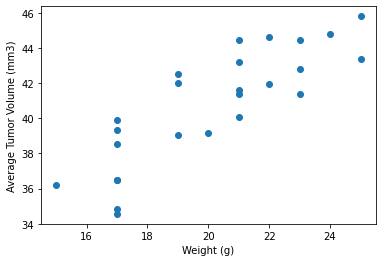

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


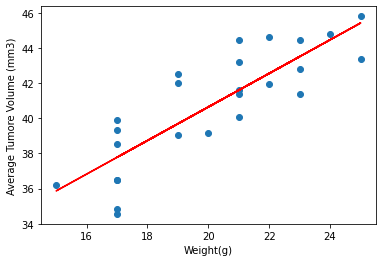

In [111]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")


model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
#model (provides slope, intercept)


mslope = 0.9544396890241045
intercept = 21.552160532685015


y_values = capavg['Weight (g)']*mslope+intercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(capavg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()






The correlation between mouse weight and the average tumor volume is 0.84


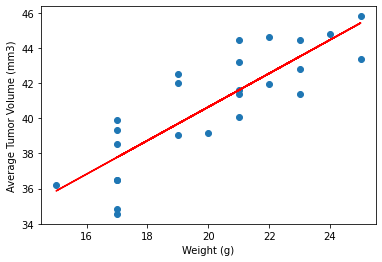